<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
sns.set_theme()

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [5]:
#ваш код здесь
resume_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', delimiter=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [6]:
#ваш код здесь
display(resume_df.head())
resume_df.shape

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
#ваш код здесь
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [8]:
#ваш код здесь
resume_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
#ваш код здесь
resume_df['Образование'] = (
    resume_df['Образование и ВУЗ']
    .str.extract(r'([ \w]*?) образование', expand=False)  # извлекаем "образование" с помощью регулярного выражения
    .str.lower()  # приводим строки к нижнем регистру
    .astype('category')  # преобразуем к категориальному типу
)
display(resume_df['Образование'].unique())

resume_df.drop(columns='Образование и ВУЗ', inplace=True)

['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее']
Categories (4, object): ['высшее', 'неоконченное высшее', 'среднее', 'среднее специальное']

In [10]:
# Задание 3.1 Сколько соискателей имеет средний уровень образования (школьное образование)?
(resume_df['Образование'] == 'среднее').sum()

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
#ваш код здесь
resume_df[['Пол', 'Возраст']] = resume_df['Пол, возраст'].str.extract(r'^([МЖ])[ ,а-я]+([\d]+)')
resume_df['Пол'] = resume_df['Пол'].astype('category')
resume_df['Возраст'] = resume_df['Возраст'].astype(int)

print('> Уникальные признаки в "Пол":\n', resume_df['Пол'].unique())
print('> Статистики в "Возраст":\n', resume_df['Возраст'].describe(), sep='')

resume_df.drop(columns=['Пол, возраст'], inplace=True)

> Уникальные признаки в "Пол":
 ['М', 'Ж']
Categories (2, object): ['Ж', 'М']
> Статистики в "Возраст":
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


In [12]:
# Задание 3.2 Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print('Процент женских резюме:', 
      round(resume_df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2))

#Чему равен средний возраст соискателей? Ответ округлите до десятых.
print('Средний возраст:', round(resume_df['Возраст'].mean(), 1))

Процент женских резюме: 19.07
Средний возраст: 32.2



3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [13]:
#ваш код здесь

# создадим регулярное выражение, которое будет выделять группы 'years' и 'months'
# в записях об опыте работы
experience_re = re.compile(
    r'работы (?:(?P<years>[\d]*?) (?:год[а]?|лет))?\s*(?:(?P<months>[\d]*?) месяц)?')

def experience_to_months(row):
    if row is np.nan or row == 'Не указано':
        return np.nan

    # регулярным выражением находим годы и месяцы
    years, months  = experience_re.search(row).groups(0)
    return 12 * int(years) + int(months)

resume_df['Опыт работы (месяц)'] = resume_df['Опыт работы'].apply(experience_to_months)

# Задание 3.3 Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print('Медианный опыт работы (в месяцах):', resume_df['Опыт работы (месяц)'].median())

resume_df.drop(columns='Опыт работы', inplace=True)

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


**ДЛЯ ПРОВЕРЯЮЩИХ!**  
Обратите внимание, что столбец 'Город, переезд, командировки' содержит записи, которые оканчиваются на 'готов к команд', 'готов к командир', 'готов к' (см. ниже). Эталонное решение этого не учитывает. Я учитываю как готовность к командировкам все записи, которые в последней части начинаются с 'готов'. Поэтому мое решение отличается в части расчета готовых к командировкам.

In [14]:
# Последняя часть столбца "Город, переезд, командировки", которая отделена запятыми.
# Видно, что готовность к командировкам обрезается
resume_df['Город, переезд, командировки'].str.split(',').str[-1].unique()

array([' не готов к командировкам', ' готов к редким командировкам',
       ' не готова к командировкам', ' готова к командировкам',
       ' готов к командировкам', ' готова к редким командировкам', '',
       ' Самарск', ' Малайзи', ' Швейца', ' А', ' Г', ' Воронежская обл',
       ' Республи', ' Черногория', ' Рес', ' готов к команд', ' И', ' См',
       ' Тверска', ' К', ' Республика Даг', ' Ки', ' Финлянди', ' Исл',
       ' Хабаровский кр', ' Великобр', ' Свердл', ' Доминиканская Р',
       ' Тюмень', ' готов к', ' Литв', ' Новос', ' Доминикан',
       ' готов к командир', ' Евр', ' Германия', ' Республика', ' Швейц',
       ' Ростовс', ' Р', ' Приморский край', ' Кит', ' Республика Карели',
       ' Пушкино (Московск', ' Словен', ' Ита', ' Эсто', ' Ф',
       ' Новгородская област', ' Ш', ' Словени', ' Республика Ка',
       ' Япон', ' Арханг', ' Германи', ' г', ' Воронежская област',
       ' Республика Инг', ' Шв', ' Дания', ' Босния и Герцеговина'],
      dtype=object)

In [15]:
#ваш код здесь
million_cities = [
    'Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
    'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград'
]

def cities_movings_trips(row):
    # сначала отделяем первое слово от строки. Оно должно быть городом
    city, remain = [part.strip() for part in row['Город, переезд, командировки'].split(',', 1)]
    if city in ('Москва', 'Санкт-Петербург'):
        pass
    elif city in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'

    # в остатке строки отделяем по запятым последнюю часть, относящуюся к командировкам 
    remain, trips = [part.strip() for part in remain.rsplit(',', 1)]
    trips_ready = trips.startswith('готов')

    # в остатке строки (без города и командировок) ищем подстроку 'не готов'
    moving_ready = 'не готов' not in remain 
    
    return city, moving_ready, trips_ready

resume_df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = resume_df[['Город, переезд, командировки']].apply(cities_movings_trips, result_type='expand', axis=1)
resume_df.drop(columns='Город, переезд, командировки', inplace=True)

In [16]:
# Задание 3.4 Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
print('Процент соискателей, живущих в Санкт-Петербурге:', 
      round(resume_df['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100))

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
ready_df = resume_df[resume_df['Готовность к переезду'] & resume_df['Готовность к командировкам']]
print('Процент соискателей, готовых одновременно и к переездам, и к командировкам:', 
      round(ready_df.shape[0] / resume_df.shape[0] * 100))

Процент соискателей, живущих в Санкт-Петербурге: 11
Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [17]:
#ваш код здесь
for column in ('Занятость', 'График'):
    dummies_df = pd.get_dummies(
        resume_df[column]
        .str.split(',')
        .explode()
        .str.strip()
    ).groupby(level=0).any()
    resume_df = resume_df.merge(dummies_df, left_index=True, right_index=True)

display(resume_df.head())
resume_df.drop(columns=['Занятость', 'График'], inplace=True);

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,...,волонтерство,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,...,False,True,True,False,True,True,True,True,True,True
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,...,False,True,True,False,True,False,True,True,True,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,...,False,True,False,False,False,False,False,True,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,...,False,True,True,False,True,False,True,False,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,...,False,True,False,False,False,False,False,True,False,False


In [18]:
# Задание 3.5 Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print('Проектная работа и волонтерство:', 
      (resume_df['проектная работа'] & resume_df['волонтерство']).sum())

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print('Вахтовый метод и гибкий график:', 
      (resume_df['вахтовый метод'] & resume_df['гибкий график']).sum())

Проектная работа и волонтерство: 436
Вахтовый метод и гибкий график: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [19]:
#ваш код здесь

# из таблицы валют читаем только нужные столбцы
# сразу конвертируем дату в datetime 
currencies_df = pd.read_csv(
    'data/ExchangeRates.zip',
    usecols=['currency', 'date', 'proportion', 'close'],
    parse_dates=['date'],
    date_format='%d/%m/%y'
)
display(currencies_df.head())

# преобразуем дату к типу datetime
resume_df['Обновление резюме'] = pd.to_datetime(resume_df['Обновление резюме'], dayfirst=True).dt.normalize()
# разделяем зарплату на сумму зарплаты и валюту
resume_df[['ЗП сумма', 'ЗП валюта']] = resume_df['ЗП'].str.split(expand=True)
resume_df['ЗП сумма'] = resume_df['ЗП сумма'].astype(float)
display(resume_df.head())

,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
1,USD,2017-12-30,57.6002,1
2,USD,2017-12-31,57.6002,1
3,USD,2018-01-01,57.6002,1
4,USD,2018-01-02,57.6002,1


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП сумма,ЗП валюта
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,False,True,True,True,True,True,True,29000.0,руб.
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,...,True,False,True,False,True,True,True,True,40000.0,руб.
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,...,False,False,False,False,False,True,False,False,20000.0,руб.
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,...,True,False,True,False,True,False,False,True,100000.0,руб.
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,...,False,False,False,False,False,True,False,False,140000.0,руб.


In [20]:
# сравним наименования валют в таблицах resume_df и currencies_df
print('Валюты в resume_df:', resume_df['ЗП валюта'].unique())
print('Валюты в currencies_df:', currencies_df['currency'].unique())

Валюты в resume_df: ['руб.' 'бел.руб.' 'KZT' 'EUR' 'USD' 'грн.' 'сум' 'KGS' 'AZN']
Валюты в currencies_df: ['USD' 'EUR' 'KZT' 'KGS' 'BYN' 'UAH' 'UZS' 'AZN']


In [21]:
# создадим словарь валют для приведения валют к одному формату
currencies_map = {'руб.': 'RUB', 'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'}
# заменим значения в 'ЗП валюта' на ISO наименования
resume_df['ЗП валюта'] = resume_df['ЗП валюта'].apply(lambda x: currencies_map.get(x, x))

# объединяем таблицы
resume_df = resume_df.merge(
    currencies_df, 
    how='left',  # для сохранения записей с 'ЗП валюта'=='руб.' объединяем влево
    left_on=['Обновление резюме', 'ЗП валюта'],
    right_on=['date', 'currency'],
).drop(columns=['date', 'currency'])  # удалим ненужные столбцы после объединения
# заполним единицей поля для рублей   
resume_df[['close', 'proportion']] = resume_df[['close', 'proportion']].fillna(1)  
# создаем столбец с зарплатой в рублях
resume_df['ЗП (руб)'] = resume_df['ЗП сумма'] * resume_df['close'] / resume_df['proportion']
# удаляем ненужные столбцы
resume_df.drop(columns=['ЗП', 'ЗП сумма', 'ЗП валюта', 'close', 'proportion'], inplace=True)

In [22]:
# Задание 3.6 Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого. 
print('Желаемая медианная заработная плата:', 
      round(resume_df['ЗП (руб)'].median() / 1000))

Желаемая медианная заработная плата: 59


# Исследование зависимостей в данных

#### 1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

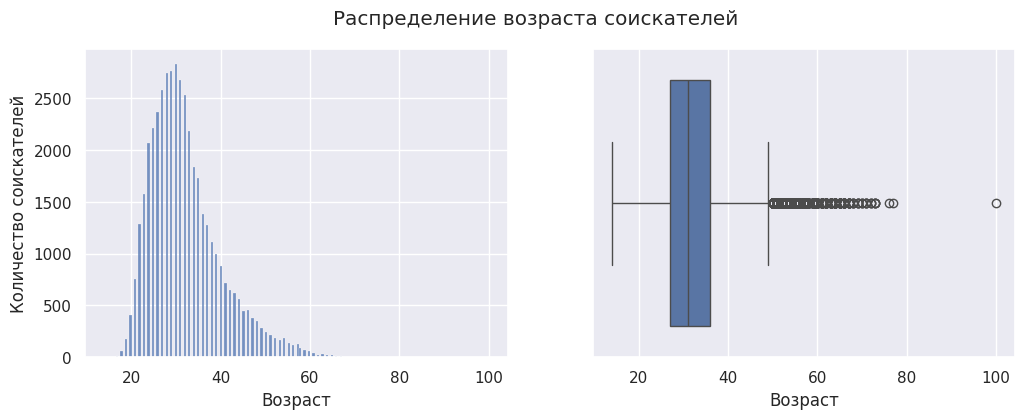

In [23]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

fig.suptitle('Распределение возраста соискателей')
sns.histplot(resume_df['Возраст'], ax=axes[0]).set_ylabel('Количество соискателей')
sns.boxplot(x=resume_df['Возраст'], ax=axes[1]);

In [24]:
display(resume_df[(resume_df['Возраст'] < 16) | (resume_df['Возраст'] > 80)])
print('Мода распределения возраста:', resume_df['Возраст'].mode()[0], end='\n\n')
display(resume_df['Возраст'].describe())

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,высшее,М,14,477.0,Москва,...,True,False,False,False,False,False,True,False,False,60000.0
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,True,False,True,False,True,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,False,True,True,False,True,60000.0


Мода распределения возраста: 30



count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

ваши выводы по графику здесь

* Мода распределения равна 30.
* Минимум - 14, максимум - 100.
* Возраст большинства соискателей в пределах 27-36 лет.
* Видим одну аномалию: запись содержит возраст 100. Очевидно, что это ненастоящий возраст. Запись следует удалить при построении модели.

### 2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

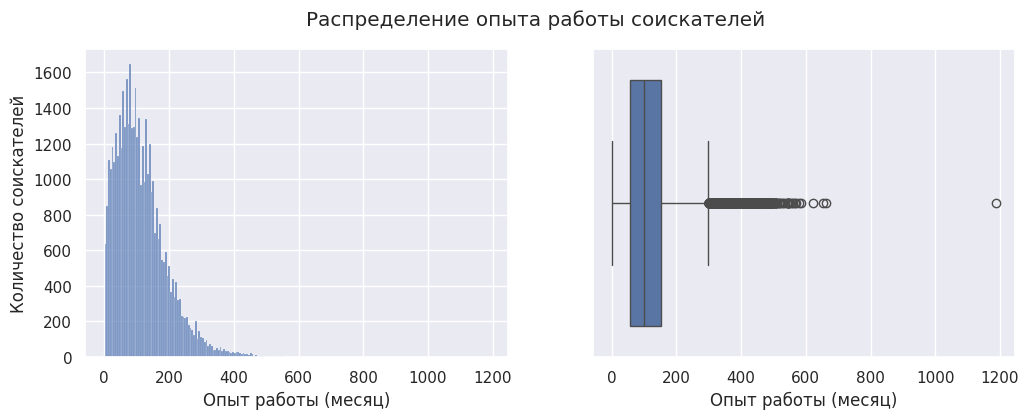

In [25]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

fig.suptitle('Распределение опыта работы соискателей')
sns.histplot(resume_df['Опыт работы (месяц)'], ax=axes[0]).set_ylabel('Количество соискателей')
sns.boxplot(x=resume_df['Опыт работы (месяц)'], ax=axes[1]);

In [26]:
display(resume_df[resume_df['Опыт работы (месяц)'] > 600])
print('Мода опыта работы:', resume_df['Опыт работы (месяц)'].mode()[0], end='\n\n')
display(resume_df['Опыт работы (месяц)'].describe())

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
3293,Руководитель проектов,430 военное представительство МО РФ,Специалист первой категории,2019-04-26,Имеется собственный автомобиль,высшее,М,73,663.0,Москва,...,True,False,False,False,False,False,True,False,False,50000.0
10044,Инженер слаботочных систем электрик,"ТЭК СПб, ГУП",Инженер,2019-04-20,Имеется собственный автомобиль,высшее,М,71,653.0,Санкт-Петербург,...,True,False,False,True,False,False,True,False,False,40000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,высшее,М,48,1188.0,город-миллионник,...,True,False,False,True,True,True,True,False,True,60000.0
44363,Эксперт (специалист) по информационной безопас...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",2019-04-26,Не указано,высшее,М,70,622.0,Москва,...,True,False,False,False,False,False,True,False,False,350000.0


Мода опыта работы: 81.0



count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

ваши выводы здесь

* Мода распределения равна 81.
* Минимум - 1, максимум - 1188.
* Возраст большинства соискателей в пределах 57-154 месяцев.
* Видим одну аномалию: запись содержит опыт работы 1188, что больше чем указанный в записи возраст. Запись следует удалить при построении модели или заменить опыт работы, например, на $('Возраст' - 20) * 12$.

### 3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака  заработной платы? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


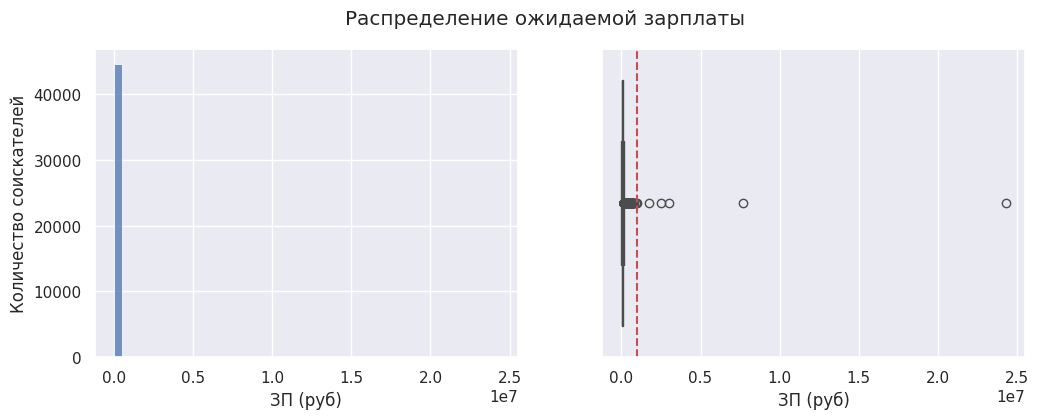

In [27]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

fig.suptitle('Распределение ожидаемой зарплаты')
sns.histplot(resume_df['ЗП (руб)'], ax=axes[0], bins=50).set_ylabel('Количество соискателей')
sns.boxplot(x=resume_df['ЗП (руб)'], ax=axes[1])
axes[1].axvline(1_000_000, linestyle='--', color='r');

In [28]:
display(resume_df[resume_df['ЗП (руб)'] > 1_000_000])
print('Мода ожидаемой зарплаты:', resume_df['ЗП (руб)'].mode()[0], end='\n\n')
display(resume_df['ЗП (руб)'].describe())

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,другие,...,True,True,False,True,False,True,True,True,True,24304876.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,высшее,М,39,280.0,Москва,...,True,True,False,True,True,True,True,False,True,3000000.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,среднее специальное,М,29,98.0,другие,...,True,False,False,False,False,False,True,False,False,7675224.0
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,неоконченное высшее,М,24,39.0,Москва,...,True,True,False,True,False,True,True,False,True,1750000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,Москва,...,True,False,False,False,False,False,True,False,False,2500000.0


Мода ожидаемой зарплаты: 50000.0



count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

Видим, что присутствуют слишком большие значения ожидаемой зарплаты. Перепостроим графики со значениями зарплаты до 1 млн., чтобы иметь больше понимания о распределении. 

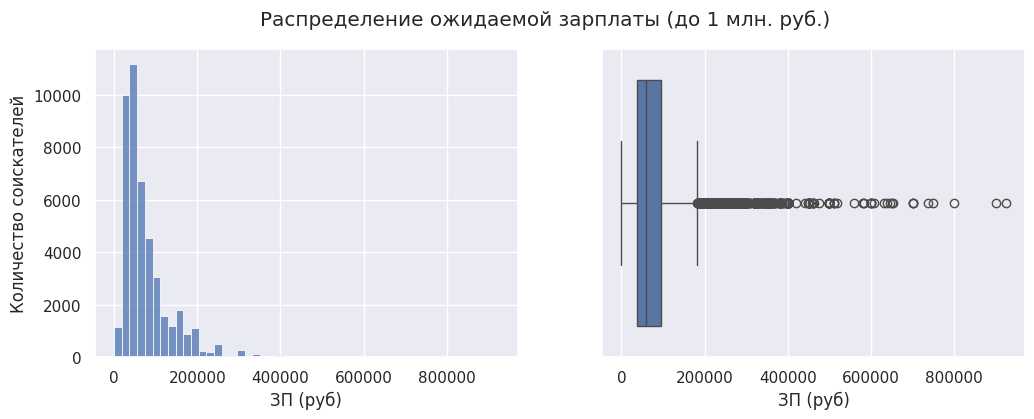

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

zp_df = resume_df[resume_df['ЗП (руб)'] < 1_000_000]['ЗП (руб)']
fig.suptitle('Распределение ожидаемой зарплаты (до 1 млн. руб.)')
sns.histplot(zp_df, ax=axes[0], bins=50).set_ylabel('Количество соискателей')
sns.boxplot(x=zp_df, ax=axes[1]);

ваши выводы здесь

* Мода распределения равна 50000.
* Минимум - 1, максимум - 24_304_880.
* Ожидаемая зарплата большинства соискателей в пределах 37082-95000 рублей.
* Видим, что присутствуют слишком большие значения ожидаемой зарплаты. Теоретически это может быть ожидаемая зарплата. Есть 5 записей с желаемой зарплатой от 1 млн. Некоторые должности, возможно, могли бы претендовать на такие зарплаты. Но это слишком большие выбросы для модели.

### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

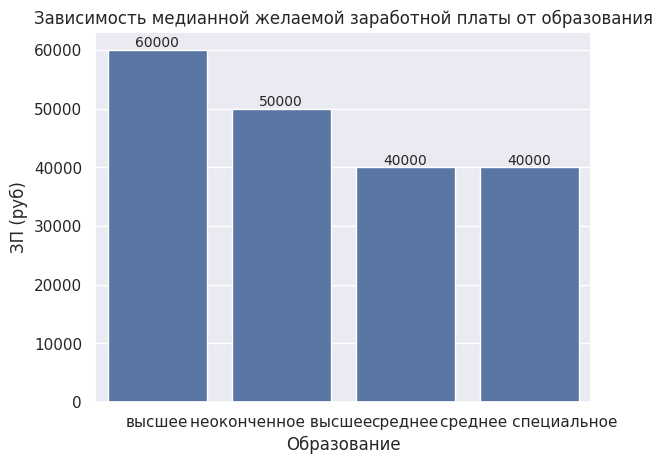

In [30]:
# ваш код здесь
barplot = sns.barplot(resume_df[resume_df['ЗП (руб)'] < 1_000_000], 
                      x='Образование', y='ЗП (руб)', estimator='median', errorbar=None)
barplot.set_title('Зависимость медианной желаемой заработной платы от образования')
barplot.bar_label(barplot.containers[0], fontsize=10);

ваши выводы здесь

* Максимальная медианная ожидаемая зарплата наблюдается для соискателей с высшим образованием, 60000 руб.
* Минимальная - для соискателей со средним и средним специальным образованием - 40000 руб.
* Признак образования имеет значение для прогнозирования заработной платы, т.к. разница между медианными зарплатами в зависимости от образования значительно отличается.

### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

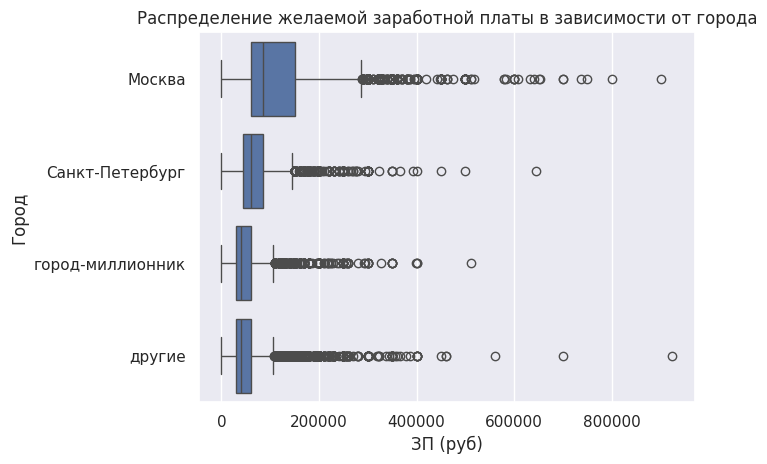

In [31]:
# ваш код здесь
boxplot = sns.boxplot(resume_df[resume_df['ЗП (руб)'] < 1_000_000], 
                      x='ЗП (руб)', y='Город', 
                      order=['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие'])
boxplot.set_title('Распределение желаемой заработной платы в зависимости от города');

ваши выводы здесь

* В Москве уровень ожидаемой заработной платы заметно выше, чем в остальных городах. При этом, размах ожиданий в Москве также очень шировкий. В Санкт-Петербурге ожидания лишь немного выше всех остальных городов.
* Признак города имеет значение при прогнозировании. Стоит отметить, что ожидаемая зарплата в города-миллионники и "других" фактически не отличается. Для прогноза заплаты эти категории можно было бы объединить.

### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

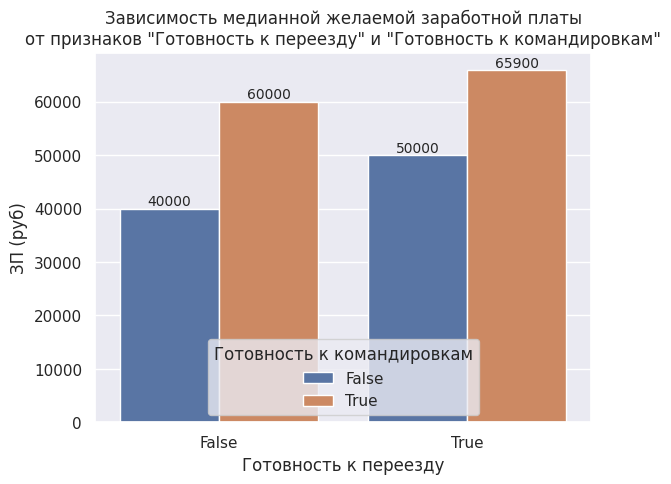

In [32]:
# ваш код здесь
grouped_df = resume_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
barplot = sns.barplot(grouped_df, x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам');
barplot.set_title('Зависимость медианной желаемой заработной платы\nот признаков "Готовность к переезду" и "Готовность к командировкам"')
barplot.legend(loc='lower center', title='Готовность к командировкам')
barplot.bar_label(barplot.containers[0], fontsize=10)
barplot.bar_label(barplot.containers[1], fontsize=10);

ваши выводы здесь

* При готовности к переезду соискатель ожидает немного большую зарплату.
* При готовности к командировкам соискатель ожидает заметно большей зарплаты.
* Для отображения такой зависимости по двум осям, по-моему, было бы логично использовать 3D диаграмму.

### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

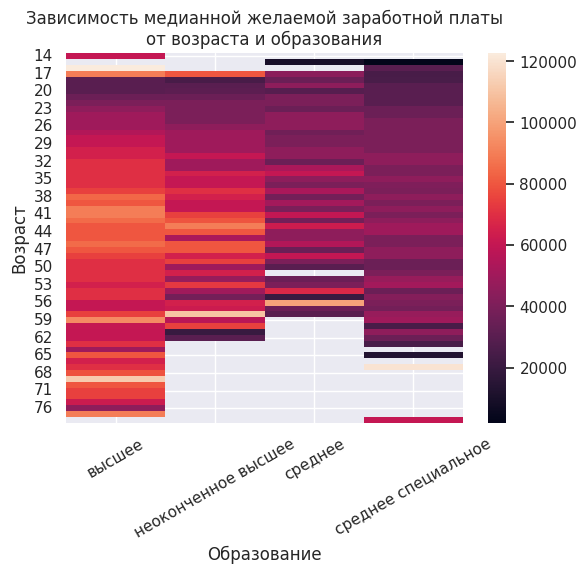

In [33]:
# ваш код здесь
pivot = resume_df.pivot_table(index='Возраст', columns='Образование', values='ЗП (руб)', 
                              aggfunc='median', observed=False)
heatmap = sns.heatmap(pivot)
heatmap.tick_params(axis='x', rotation=30)
heatmap.set_title('Зависимость медианной желаемой заработной платы\nот возраста и образования');

ваши выводы здесь

### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

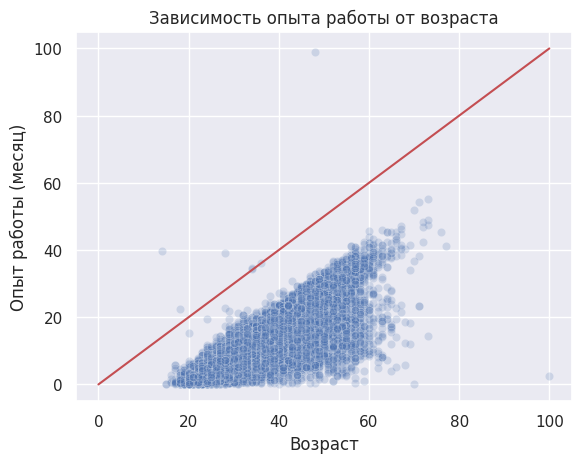

In [34]:
# ваш код здесь
scatterplot = sns.scatterplot(
    x=resume_df['Возраст'],
    y=resume_df['Опыт работы (месяц)'] / 12,
    alpha=0.2
)
sns.lineplot(x=[0, 100], y=[0, 100], color='r')
scatterplot.set_title('Зависимость опыта работы от возраста');

In [35]:
# Задание 4.8  Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, 
# то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией либо получить 
# таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.

print('Количество записей с опытом работы большим возраста:',
      resume_df[resume_df['Опыт работы (месяц)'] / 12 > resume_df['Возраст']].shape[0])

Количество записей с опытом работы большим возраста: 7


ваши выводы здесь

* На графике видно, что некоторые записи содержат явно неправильные данные, т.к. точки, лежащие выше прямой, указывают на то, что опыт работы соискателя больше его возраста.
* В целом, можно сказать, что есть некоторая линейная зависимость между возрастом и опытом работы.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


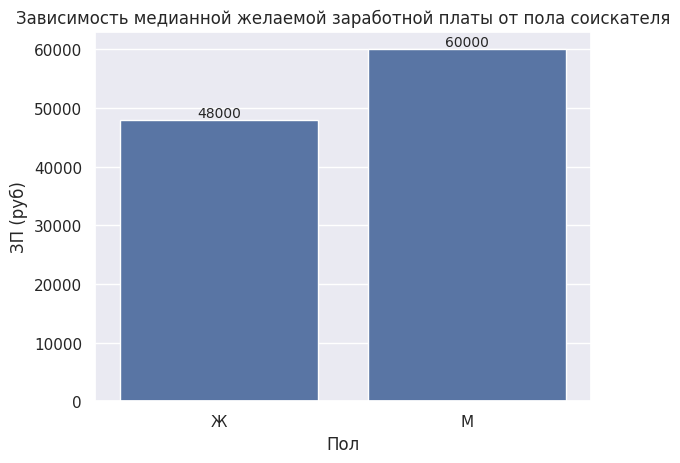

In [36]:
# ваш код здесь
barplot = sns.barplot(resume_df, x='Пол', y='ЗП (руб)', estimator='median', errorbar=None)
barplot.set_title('Зависимость медианной желаемой заработной платы от пола соискателя')
barplot.bar_label(barplot.containers[0], fontsize=10);

* Мужчины ожидают большей заработной платы, чем женщины.

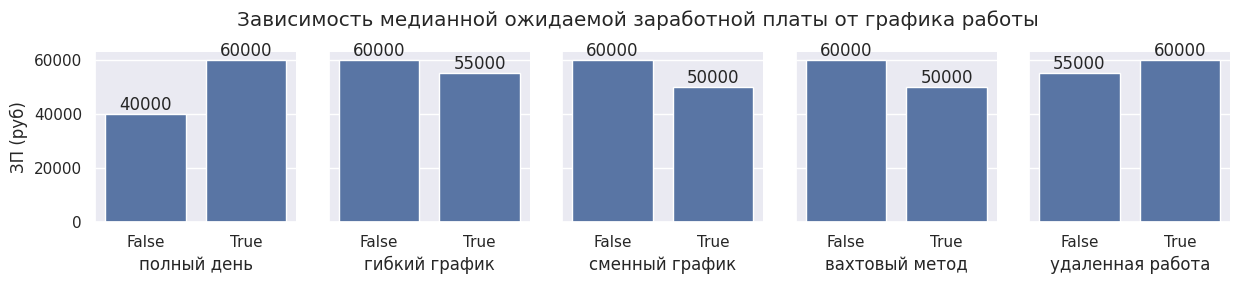

In [37]:
grid = sns.PairGrid(
    resume_df, 
    y_vars='ЗП (руб)',
    x_vars=["полный день", "гибкий график", "сменный график", "вахтовый метод", 'удаленная работа'],
)
grid.fig.suptitle('Зависимость медианной ожидаемой заработной платы от графика работы', y=1.1)
grid.map(sns.barplot, estimator='median', errorbar=None);
for ax in grid.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

* Наибольшее влияние на зарплату имеет готовность работать полный день. Соискатели, которые готовы работать полный день, ожидают на 50% большей зарплаты, чем те, кто готов работать по другим графикам.
* Соискатели на позиции со сменным графиком и вахтовым методом имеют самые низкие ожидания по зарплате. 

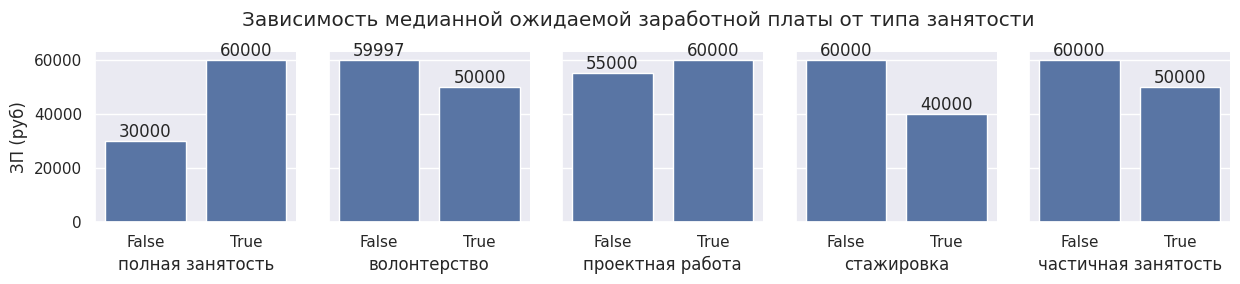

In [38]:
grid = sns.PairGrid(
    resume_df, 
    y_vars='ЗП (руб)',
    x_vars=['полная занятость', 'волонтерство', 'проектная работа', 'стажировка', 'частичная занятость'],
)
grid.fig.suptitle('Зависимость медианной ожидаемой заработной платы от типа занятости', y=1.1)
grid.map(sns.barplot, estimator='median', errorbar=None);
for ax in grid.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

* Наибольшее влияние на зарплату имеет готовность на полную занятость. Соискатели, которые готовы работать полный день, ожидают в 2 раза большую зарплату, чем те, кто готов только к другим типам занятости.
* Соискатели на стажировка имеют самые низкие ожидания по зарплате. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [39]:
# ваш код здесь

# Задание 5.1 Сколько полных копий удалось найти?
print('Найдено дубликатов:', resume_df.duplicated().sum())

resume_df.drop_duplicates(inplace=True)

Найдено дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [40]:
# ваш код здесь
resume_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [41]:
# ваш код здесь
resume_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)
resume_df.fillna({'Опыт работы (месяц)': resume_df['Опыт работы (месяц)'].median()}, inplace=True)

# Задание 5.3 Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых. 
print('Среднее занчение опыта работы:', round(resume_df['Опыт работы (месяц)'].mean()))

Среднее занчение опыта работы: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [42]:
# ваш код здесь
index_to_drop = resume_df[(resume_df['ЗП (руб)'] < 1000) | (resume_df['ЗП (руб)'] > 1_000_000)].index

# Задание 5.4 Сколько выбросов вы нашли?
print('Количество выбросов:', index_to_drop.size)

resume_df.drop(index_to_drop, inplace=True)

Количество выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [43]:
# ваш код здесь
index_to_drop = resume_df[resume_df['Возраст'] < resume_df['Опыт работы (месяц)'] / 12].index

# Задание 5.5 Сколько выбросов вы нашли?
print('Количество выбросов:', index_to_drop.size)

resume_df.drop(index_to_drop, inplace=True)

Количество выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

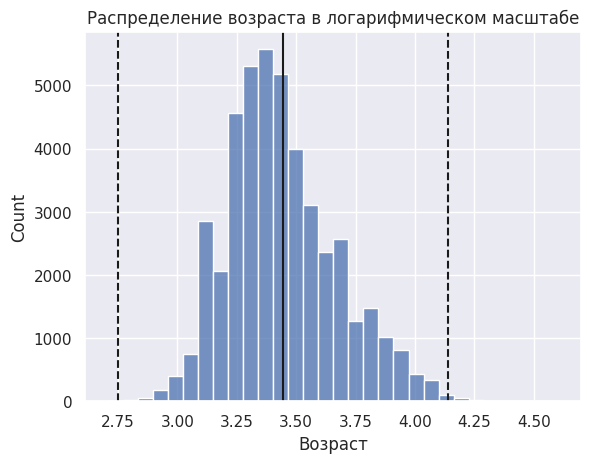

In [44]:
# ваш код здесь
log_age = np.log(resume_df['Возраст'])
mu, sigma = log_age.mean(), log_age.std()

histplot = sns.histplot(log_age, bins=30)
histplot.axvline(mu, color='k')
histplot.axvline(mu - 3 * sigma, color='k', ls='--')
histplot.axvline(mu + 3 * sigma, color='k', ls='--')
histplot.set_title('Распределение возраста в логарифмическом масштабе');


# функция для получения очищенных данных и выбросов методом z-отклонений
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu, sigma = x.mean(), x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(resume_df, 'Возраст', log_scale=True, left=3, right=4)

In [45]:
# удаленные выбросы по возрасту
display(outliers)

# Задание 5.6 Сколько выбросов вы нашли с помощью метода z-отклонений?
print('Количество выбросов:', outliers.shape[0])

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,True,False,True,False,True,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,False,True,True,False,True,60000.0


Количество выбросов: 3


ваш коммментарий здесь
* Распределение асимметрично вправо.
* Выбросами по методу z-отклонений оказались записи с возрастом 15 и 100 лет. При этом, запись 100 лет попала в выбросы даже при допуске вправо в 4 сигмы.